In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#`1.  What is the overall distribution of passengers across different classes (Pclass)?

In [7]:
titanic['pclass'].unique()

array([3, 1, 2])

In [8]:
titanic['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


Text(0.5, 1.0, 'passanger count by pclass')

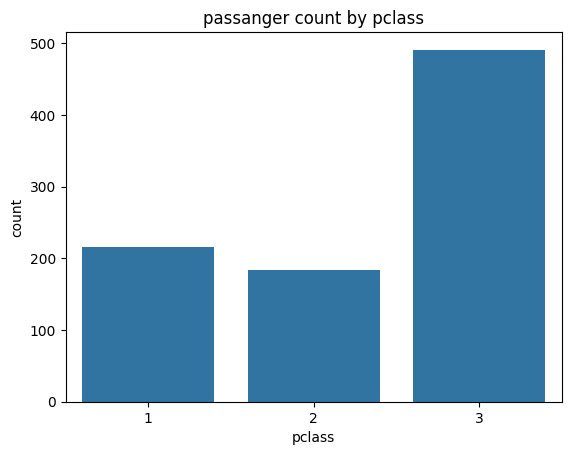

In [9]:
sns.countplot(data=titanic, x = 'pclass')
plt.title('passanger count by pclass')

#2.   How is the age of passengers distributed?

Text(0.5, 1.0, 'age distribution')

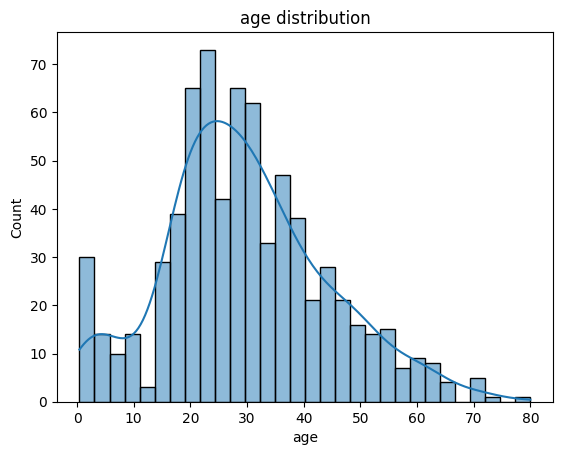

In [10]:
sns.histplot(titanic['age'], kde = True, bins = 30)    #kde = kernel density estimater
plt.title('age distribution')

#3.   What is the distribution of passengers based on Sex?

In [11]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
titanic['sex'].value_counts()

,count
sex,
male,577
female,314


Text(0.5, 1.0, 'passengers based on gender')

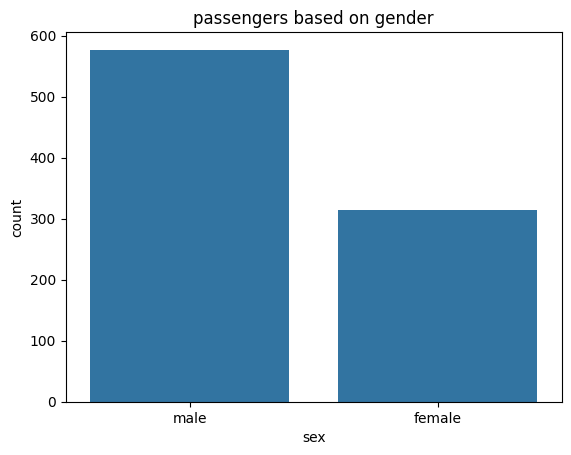

In [13]:
sns.countplot(data = titanic, x= 'sex')
plt.title('passengers based on gender')

#4.   How many passengers embarked from each port (Embarked)

In [14]:
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
titanic['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


Text(0.5, 1.0, 'passenger count by embarkation point')

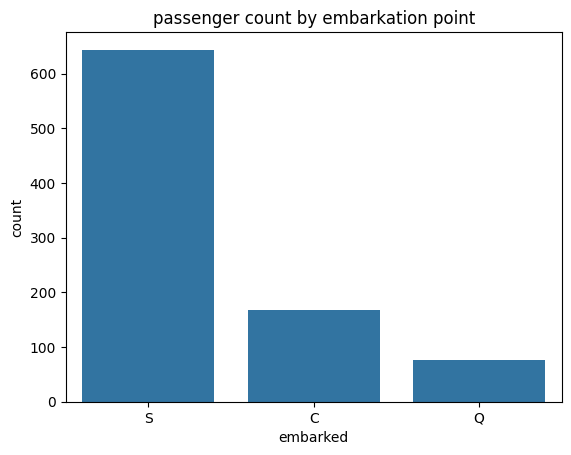

In [16]:
sns.countplot(data = titanic, x= 'embarked')
plt.title('passenger count by embarkation point')

#5.   What is the survival rate overall, and how does it vary by Pclass?

<Axes: xlabel='pclass', ylabel='survived'>

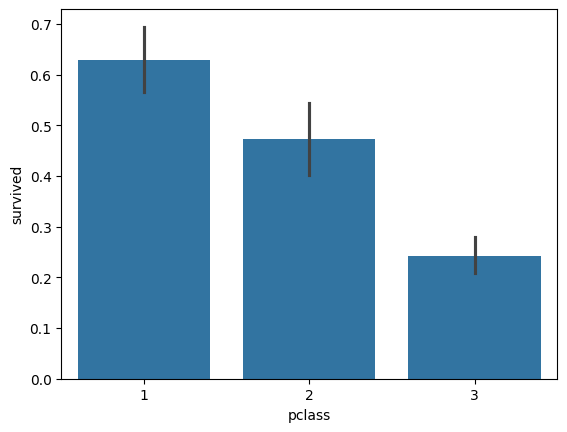

In [17]:
sns.barplot(data = titanic, x= 'pclass', y = 'survived')

In [18]:
overall_survived_rate = titanic['survived'].mean()

In [19]:
print('overall_survived_rate:-', overall_survived_rate)

overall_survived_rate:- 0.3838383838383838


In [20]:
survival_rate_by_pclass = titanic.groupby('pclass')['survived'].mean()

In [21]:
print('survival_rate_by_pclass:-', survival_rate_by_pclass)

survival_rate_by_pclass:- pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


#6.  What is the survival rate for males vs. females?

In [22]:
survival_rate_by_gender = titanic.groupby('sex')['survived'].mean()

In [23]:
print('survival_rate_by_gender:-', survival_rate_by_gender)

survival_rate_by_gender:- sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


<Axes: xlabel='survived', ylabel='Count'>

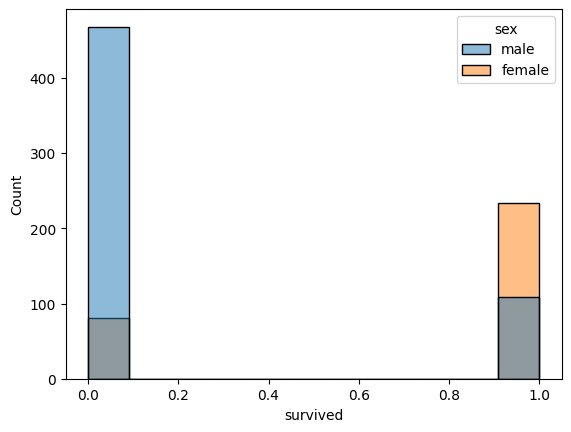

In [24]:
sns.histplot(data = titanic, x= 'survived', hue= 'sex')

#7.  What is the survival rate for passengers from different embarkation points (Embarked)

In [25]:
survival_rate_by_embarked = titanic.groupby('embarked')['survived'].mean()

In [26]:
print('survival_rate_by_embarked:-', survival_rate_by_embarked)

survival_rate_by_embarked:- embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


#8.  How does the survival rate vary across different ticket classes (Pclass)?

In [27]:
survival_rate_by_pclass = titanic.groupby('pclass')['survived'].mean()

In [28]:
print('survival_rate_by_pclass:-', survival_rate_by_pclass)

survival_rate_by_pclass:- pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


#9. Is there any relationship between the number of siblings/spouses aboard (SibSp) and


In [29]:
relationship_bet_sibsp_survived = titanic.groupby('sibsp')['survived'].mean().reset_index()

In [30]:
relationship_bet_sibsp_survived

,sibsp,survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#10.  How does the number of parents/children aboard (Parch) affect survival?

In [31]:
titanic['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [32]:
titanic['parch'].value_counts()

,count
parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


<Axes: xlabel='parch', ylabel='count'>

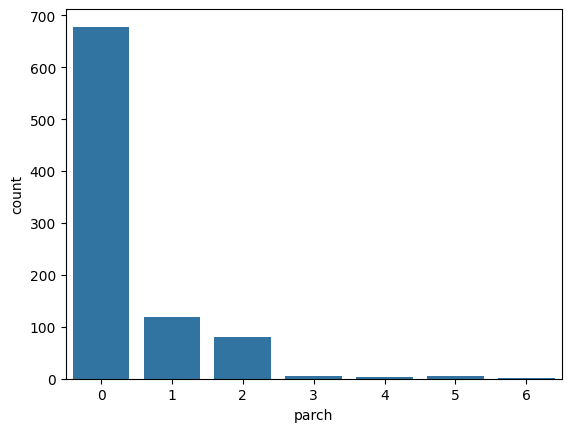

In [33]:
sns.countplot(x= 'parch', data = titanic)